# 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# 2. Data Loading

In [ ]:
netflix = pd.read_csv('netflix1.csv')

# 3. Exploring Data

In [ ]:
print("First 5 rows of the dataframe:")
print(netflix.head())

First 5 rows of the dataframe:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV A

In [ ]:
print(netflix.describe())

       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
print(netflix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [ ]:
print(netflix.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
print(netflix.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
print(f"DataFrame shape: {netflix.shape}")


DataFrame shape: (8790, 10)


In [ ]:
print(netflix.dtypes)

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


# 4. Data Cleaning

In [ ]:
print(netflix.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
netflix.dropna(inplace=True)

In [ ]:
print(netflix[netflix.duplicated()])
netflix.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [show_id, type, title, director, country, date_added, release_year, rating, duration, listed_in]
Index: []


# Total Content on Netflix

In [ ]:
total_movies = netflix[netflix['type'] == 'Movie'].shape[0]
total_tv_shows = netflix[netflix['type'] == 'TV Show'].shape[0]

print(f"Total Movies on Netflix: {total_movies}")
print(f"Total TV Shows on Netflix: {total_tv_shows}")

Total Movies on Netflix: 6126
Total TV Shows on Netflix: 2664


#  Top 10 countries with Netflix Content

In [ ]:
top_countries = netflix['country'].value_counts().head(10)
print("Top 10 Countries with Netflix Content:")
print(top_countries)

Top 10 Countries with Netflix Content:
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


# Monthly Trend of Movie and TV Show Releases

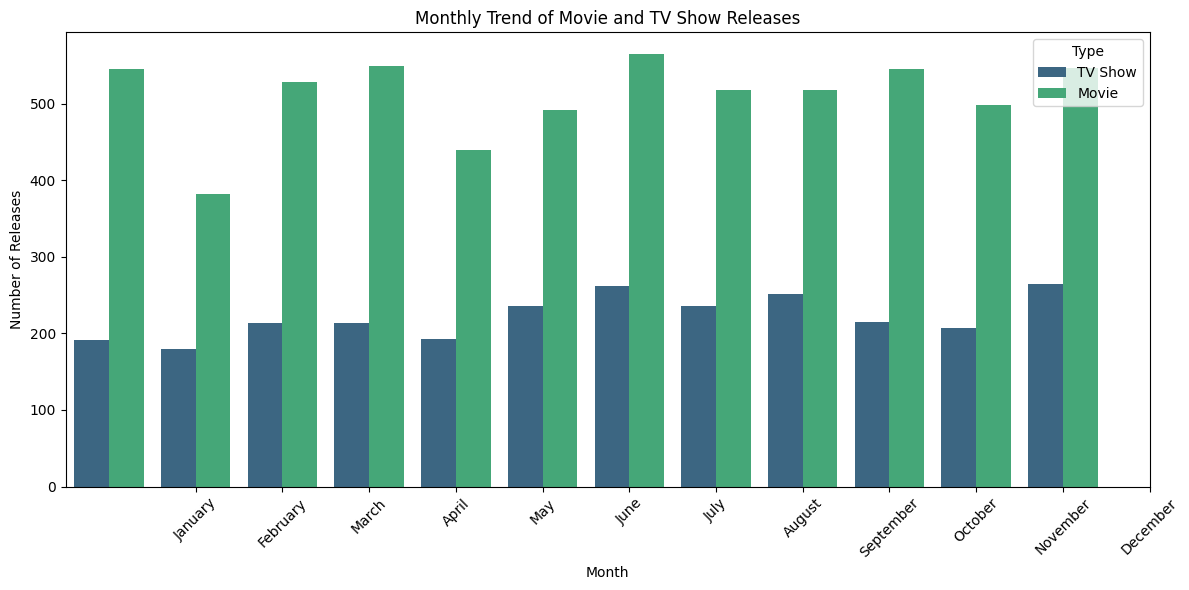

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['month_added'] = netflix['date_added'].dt.month
netflix['year_added'] = netflix['date_added'].dt.year

movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']
plt.figure(figsize=(12, 6))
sns.countplot(x='month_added', hue='type', data=netflix, palette='viridis')
plt.title('Monthly Trend of Movie and TV Show Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()

#  Yearly Trend of Movie and TV Show Releases

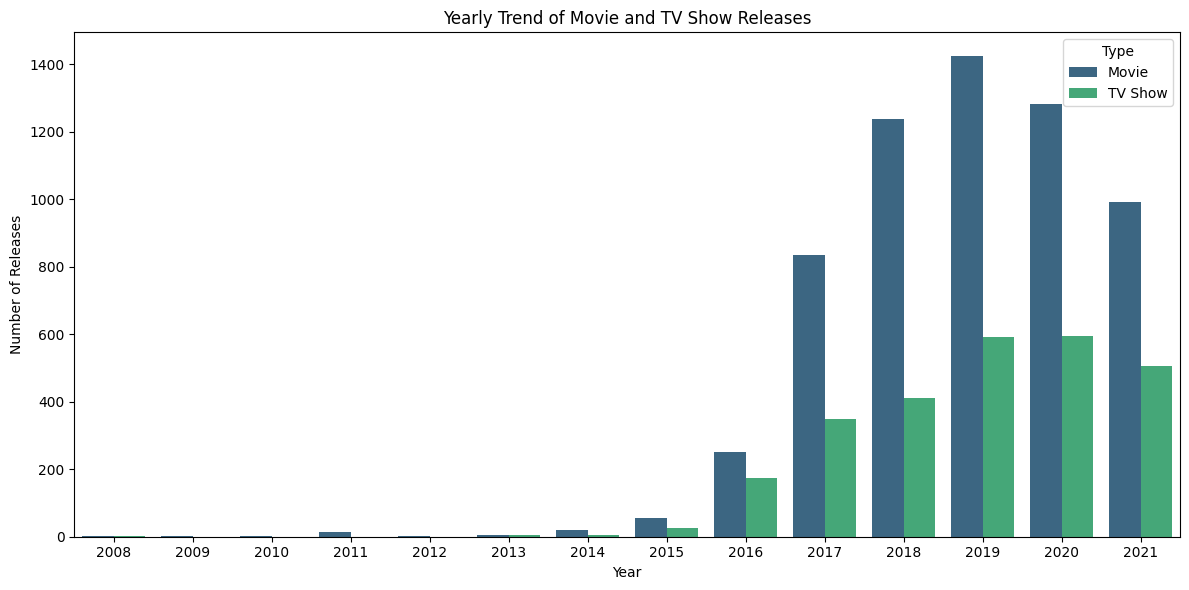

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', hue='type', data=netflix, palette='viridis')
plt.title('Yearly Trend of Movie and TV Show Releases')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()

# Top 10 Movies

In [ ]:
netflix['rating'] = pd.to_numeric(netflix['rating'], errors='coerce')
top_10_movies = netflix[netflix['type'] == 'Movie'].nlargest(10, 'rating')
print(top_10_movies[['title', 'rating']])

                               title  rating
0               Dick Johnson Is Dead     NaN
3   Confessions of an Invisible Girl     NaN
4                            Sankofa     NaN
6                       The Starling     NaN
7    Motu Patlu in the Game of Zones     NaN
8                       Je Suis Karl     NaN
9           Motu Patlu in Wonderland     NaN
10    Motu Patlu: Deep Sea Adventure     NaN
11          Motu Patlu: Mission Moon     NaN
12                  99 Songs (Tamil)     NaN


# Top 10 TV Show

In [ ]:
top_10_tv_shows = netflix[netflix['type'] == 'TV Show'].nlargest(10, 'rating')

print(top_10_tv_shows[['title', 'rating']])


                                              title  rating
1                                         Ganglands     NaN
2                                     Midnight Mass     NaN
5                     The Great British Baking Show     NaN
17                            Jailbirds New Orleans     NaN
18                  Crime Stories: India Detectives     NaN
20                            True: Magical Friends     NaN
21                           True: Wonderful Wishes     NaN
22                           Dance & Sing with True     NaN
24                                 Bangkok Breaking     NaN
27  Monsters Inside: The 24 Faces of Billy Milligan     NaN


#  Top_10_Directors

In [ ]:
director_counts = netflix['director'].value_counts()
top_10_directors = director_counts.head(10)
print(top_10_directors)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64
